# Распределение данных и распределение выбороке
## Случайный отбор и смещенная выборка
* Смещение
* Случайный отбор
* Размер против качества: когда размер имеет значение?
* Выборочное средние против популяционного среднего

## Систематическая ошибка отбора
* Регрессия к среднему

## Выборочное распределение статистической величины
* Центральная предельная теорема
* Стандартная ошибка

In [24]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.utils import resample
import scipy

In [ ]:
# Если в файле только одна колонка, squeeze('columns') вернёт объект Series, а не DataFrame.
loans_income_df = pd.read_csv('/home/renat/Desktop/programming/data_science/books/prac_stat_for_ds_bruce_pratec/data/07_loans_income.csv').squeeze('columns')

In [ ]:
type(loans_income_df)

In [ ]:
loans_income_df.head()

In [ ]:
loans_income_df.shape

In [ ]:
type(loans_income_df)

In [ ]:
# Взять простую случайную выборку
sample_data = pd.DataFrame({
    'income' : loans_income_df.sample(n=1000),
    'type' : 'Data'
})

In [ ]:
sample_data.head(3)

In [ ]:
sample_data.shape

In [ ]:
# Взять выборку средних по 5 значений
'''Создаём DataFrame, где каждая строка — это среднее из 5 случайных значений из loans_income_df, повторённое 1000 раз.'''
sample_mean_05 = pd.DataFrame({
    'income': [loans_income_df.sample(5).mean() for _ in range(1000)],
    'type': 'Mean of 5',
})

In [ ]:
sample_mean_05.head(3)

In [ ]:
sample_data.shape

In [ ]:
# Взять выборку средних по 20 значений
'''Создаём DataFrame, где каждая строка — это среднее из 20 случайных значений из loans_income_df, повторённое 1000 раз.'''
sample_mean_20 = pd.DataFrame({
    'income': [loans_income_df.sample(20).mean() for _ in range(1000)],
    'type': 'Mean of 20',
})

In [ ]:
sample_mean_20.head(3)

In [ ]:
sample_data.shape

In [ ]:
results = pd.concat([sample_data, sample_mean_05, sample_mean_20])
print(results.head(3))

# Создаём сетку графиков (FacetGrid), где гистограммы распределения income строятся отдельно для каждого типа type.
'''aspect=2 задаёт соотношение ширины к высоте каждого графика.
То есть каждый график будет шириной 6 и высотой 3 (width=height*aspect).'''
g = sns.FacetGrid(data=results, col='type', col_wrap=1, height=3, aspect=2)
# Рисуем гистограммы для income с диапазоном [0, 200_000] и 40 бинами.
# Параметр bins=40 означает, что гистограмма будет разделена на 40 столбцов (бинов), равномерно распределённых в диапазоне [0, 200_000].
g.map(plt.hist, 'income', range=[0, 200_000], bins=40)
# Устанавливаем подписи для осей (X: Income, Y: Count).
g.set_axis_labels('Income', 'Count')
# Настраиваем заголовки для каждого графика, используя значения из col='type'.
'''col='type' в FacetGrid означает, что создаётся отдельный график для каждого уникального значения в колонке 'type'.
set_titles('{col_name}') автоматически подставляет название текущей категории (type) в заголовок каждого графика.'''
g.set_titles('{col_name}')

plt.tight_layout()
plt.show()

## Бутсрап
* Повторный отбор против бутстрапирования

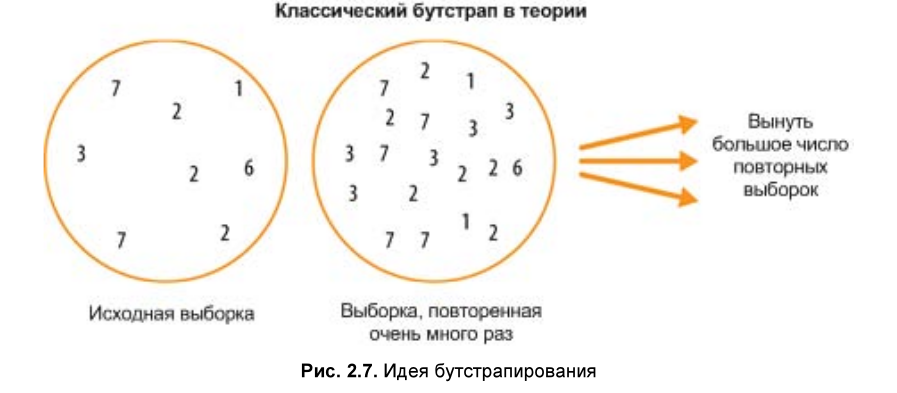

In [ ]:
# Имплементируем (реализуем, осуществляем) подход к бутсрапу с помощью метода resample пакета scikit-learn
result_bootstrap: list = []
for nrepeat in range(1000):
    sample = resample(loans_income_df)
    result_bootstrap.append(sample.median())

result_bootstrap = pd.Series(data=result_bootstrap)
print('Статистика бутсрапа:')
print(f'Исходно: {loans_income_df.median()}')
print(f'Смещение: {result_bootstrap.mean() - loans_income_df.median()}')
print(f'Стандартная ошибка: {result_bootstrap.std()}')


In [ ]:
result_bootstrap

### Повторный отбор против бутстрапирования

## Доверительные интервалы

### С учетом выборки размера n и целевой выборочной статистики алгоритм для бутстраповского доверительного интервала будет следующим:
1. Извлечь из данных случайную выборку размера *n* с возвратом (повторная выборка);
2. Записать целевую статистику для повторной выборки;
3. Повторить шаги 1-2 много *(R)* раз;
4. Для *x%-ного* доверительного интервала отсечь `[(1 - [x/100])/2]%` от *R* результатов повторного отбора с обоих концов распределения;
5. В качестве точек отсечения принять конечные точки `x%-ного` бутстраповского доверительного интервала.

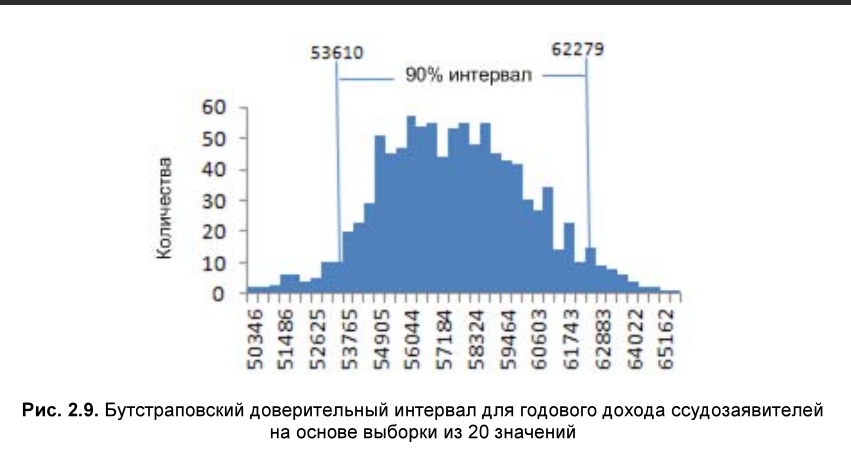

In [ ]:
import numpy as np

def bootstrap_confidence_interval(data, confidence=0.90, n_iterations=10000):
    """
    Calculates the bootstrap confidence interval for the mean of a dataset.

    Args:
        data: A list or numpy array of data.
        confidence: The desired confidence level (e.g., 0.90 for a 90% interval).
        n_iterations: The number of bootstrap iterations.

    Returns:
        A tuple containing the lower and upper bounds of the confidence interval.
    """
    data = np.array(data)
    n = len(data)
    means = []
    for _ in range(n_iterations):
        # Resample with replacement
        resample = np.random.choice(data, size=n, replace=True)
        means.append(np.mean(resample))

    # Calculate the confidence interval bounds
    alpha = (1 - confidence) / 2
    lower_percentile = alpha * 100
    upper_percentile = (1 - alpha) * 100
    
    lower_bound = np.percentile(means, lower_percentile)
    upper_bound = np.percentile(means, upper_percentile)

    return lower_bound, upper_bound

# Example usage with the provided data
data = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
confidence_level = 0.90
lower, upper = bootstrap_confidence_interval(data, confidence_level)

print(f"90% Bootstrap Confidence Interval for the mean: [{lower:.2f}, {upper:.2f}]")

## Нормальное распределение
* Стандартное нормальное распределение и квантиль-квантильные графики

In [ ]:
# Метод scipy.stats.probplot - создание квантиль-квантильного графика
# Этот код создает квантиль-квантильный график (Q-Q plot) для проверки, насколько хорошо выборка данных соответствует нормальному распределению. 

fig, ax = plt.subplots(figsize=(4, 4))
'''Генерируется выборка из 100 случайных чисел, которые следуют стандартному нормальному распределению (среднее = 0, стандартное отклонение = 1).
scipy.stats.norm.rvs — это метод для генерации случайных чисел из нормального распределения.'''
norm_sample = scipy.stats.norm.rvs(size=100)
'''Строится Q-Q plot (квантиль-квантильный график) для выборки norm_sample.
На графике сравниваются квантили выборки с квантилями теоретического нормального распределения.
Если точки на графике лежат близко к диагональной линии, это означает, что выборка хорошо соответствует нормальному распределению.'''
scipy.stats.probplot(norm_sample, plot=ax)

plt.title('Квантиль-квантильный грайик выборки, состоящей из 100 значений, извлеченных из нормального распределения\n',
          wrap=True)
plt.xlabel('Квантиль нормального распределения')
plt.ylabel('z-оценка')

## Длиннохвостовые распределения

In [ ]:
sp500_px = pd.read_csv('/home/renat/Desktop/programming/data_science/books/prac_stat_for_ds_bruce_pratec/data/08_sp500_data.csv.gz')

In [ ]:
sp500_px.head(3)

In [ ]:
sp500_px.shape

In [ ]:
# Выбираем акции Netflix
nflx = sp500_px.NFLX

'''-nflx = nflx[nflx > 0]
Фильтрует данные, оставляя только те значения, которые больше нуля.
Это может быть полезно, чтобы исключить нулевые или отрицательные значения (например, если данные содержат ошибки или пропуски).
- np.log(nflx)
Применяет натуральный логарифм к каждому значению в данных. Это часто делается для преобразования данных в логарифмическую шкалу, что полезно для:
    Уменьшения влияния выбросов.
    Преобразования мультипликативных изменений в аддитивные (например, для анализа процентных изменений).
-np.diff(np.log(nflx))
Вычисляет разницу между последовательными значениями логарифмированных данных.
'''
nflx = np.diff(np.log(nflx[nflx>0]))

In [ ]:
nflx

In [ ]:
fig, ax = plt.subplots(figsize=(4, 4))

scipy.stats.probplot(nflx, plot=ax)
# Настраиваем стиль точек
ax.get_lines()[0].set_markerfacecolor('none')  # Первые точки - это сами данные
ax.get_lines()[0].set_color(color='green')
plt.title('Квантиль-квантильный грайик возвратности для акций компании Netflix\n',
          wrap=True)
plt.xlabel('Квантиль нормального распределения')
plt.ylabel('z-оценка')
plt.tight_layout()

## **t-Распределения Стьюдента**

## **Биноминальное распределение**

In [ ]:
'''stats.binom.pmf и stats.binom.cdf - функции для биноминального распеределения'''

scipy.stats.binom.pmf(2, n=5, p=0.1)

In [ ]:
scipy.stats.binom.cdf(2, n=5, p=0.1)

## **Распределение хи-квадрат**

Что делает этот код:
Генерация данных: Мы используем chi2.rvs для генерации 1000 случайных чисел, которые следуют распределению хи-квадрат с 2 степенями свободы.

Гистограмма: Строим гистограмму для визуализации распределения данных.

Теоретическая плотность: Добавляем график теоретической плотности распределения хи-квадрат для сравнения.

Визуализация: Отображаем график с гистограммой и теоретической кривой.

Результат:
На графике вы увидите гистограмму, которая приближается к теоретической кривой плотности распределения хи-квадрат с 2 степенями свободы. Это наглядный пример того, как выглядит распределение хи-квадрат.

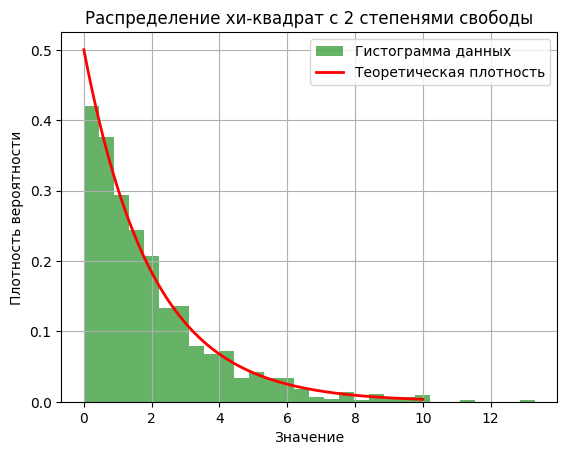

In [37]:
# Пример DeepSeek

# Параметры распределения
degrees_of_freedom = 2  # Степени свободы
sample_size = 1000      # Размер выборки

# Генерация случайных данных, распределенных по хи-квадрат
data = scipy.stats.chi2.rvs(df=degrees_of_freedom, size=sample_size)

# Построение гистограммы
plt.hist(data, bins=30, density=True, alpha=0.6, color='g', label='Гистограмма данных')

# Построение теоретической плотности распределения
x = np.linspace(0, 10, 1000)
pdf = scipy.stats.chi2.pdf(x, df=degrees_of_freedom)
plt.plot(x, pdf, 'r-', lw=2, label='Теоретическая плотность')

# Настройка графика
plt.title('Распределение хи-квадрат с 2 степенями свободы')
plt.xlabel('Значение')
plt.ylabel('Плотность вероятности')
plt.legend()
plt.grid(True)
plt.show()

In [38]:
# Проверка соответствия данных теоретическому распределению
ks_statistic, p_value = scipy.stats.kstest(data, 'chi2', args=(degrees_of_freedom,))
print(f"KS-статистика: {ks_statistic}, p-значение: {p_value}")

KS-статистика: 0.023367201046416153, p-значение: 0.6370520436374374


Пример: Проверка независимости предпочтений в еде и регионе проживания
Предположим, мы хотим проверить, зависит ли предпочтение в еде (пицца, суши, бургеры) от региона проживания (Север, Юг). Мы проводим опрос и получаем следующие данные.
Мы хотим проверить, есть ли связь между регионом и предпочтениями в еде. Для этого используем тест хи-квадрат на независимость.

In [25]:
df_chi2 = pd.DataFrame({
    'Pizza' : [30, 20],
    'Sushi' : [10, 30],
    'Burgers' : [20, 10]
}, index=['North', 'South'])

In [30]:
# Проверяем, есть ли уже столбец "Total", и удаляем его
if "Total" in df_chi2.columns:
    df_chi2 = df_chi2.drop(columns=["Total"])

# Добавляем сумму по строкам в новый столбец "Total"
df_chi2["Total"] = df_chi2.sum(axis=1)
df_chi2

,Pizza,Sushi,Burgers,Total
North,30,10,20,60
South,20,30,10,60


In [31]:
# Проверяем, есть ли уже строка "Total", и удаляем её
if "Total" in df_chi2.index:
    df_chi2 = df_chi2.drop(index="Total")
    
# Добавляем сумму по столбцам в новую строку "Total"
df_chi2.loc['Total'] = df_chi2.sum()
df_chi2

,Pizza,Sushi,Burgers,Total
North,30,10,20,60
South,20,30,10,60
Total,50,40,30,120


Шаги:
Нулевая гипотеза (H0): Предпочтения в еде не зависят от региона.

Альтернативная гипотеза (H1): Предпочтения в еде зависят от региона.

Расчет статистики хи-квадрат: Сравним наблюдаемые значения с ожидаемыми (если бы H0 была верна).

Принятие решения: Если p-значение меньше уровня значимости (например, 0.05), отвергаем H0.

In [35]:
# Наблюдаемые данные
# Выбираем строки 'North' и 'South', исключая 'Total'
observed = df_chi2.loc['North':'South', :'Burgers'].values
observed

array([[30, 10, 20],
       [20, 30, 10]])

In [36]:
# Применяем тест хи-квадрат
chi2_stat, p_value, dof, expected = scipy.stats.chi2_contingency(observed)

# Вывод результатов
print(f"Статистика хи-квадрат: {chi2_stat}")
print(f"p-значение: {p_value}")
print(f"Степени свободы: {dof}")
print("Ожидаемые частоты:")
print(expected)

Статистика хи-квадрат: 15.333333333333334
p-значение: 0.0004681758116527767
Степени свободы: 2
Ожидаемые частоты:
[[25. 20. 15.]
 [25. 20. 15.]]


### Результат:
- **Статистика хи-квадрат**: Например, 15.0.
- **p-значение**: Например, 0.001.
- **Степени свободы**: 2 (рассчитывается как `(rows - 1) * (cols - 1)`).
- **Ожидаемые частоты**: Таблица, показывающая, какие значения были бы, если бы \(H_0\) была верна.

### Интерпретация:
- Если **p-значение < 0.05**, мы отвергаем нулевую гипотезу. Это означает, что предпочтения в еде **зависят** от региона.
- Если **p-значение ≥ 0.05**, мы не можем отвергнуть нулевую гипотезу. Это означает, что предпочтения в еде **не зависят** от региона.

### Вывод:
В данном примере тест хи-квадрат помогает проверить, есть ли связь между двумя категориальными переменными. Это простой и мощный инструмент для анализа данных в реальной жизни!

## **F-распределение**

F-распределение используется в статистике для сравнения дисперсий двух выборок, например, в дисперсионном анализе (ANOVA) или в тесте на равенство дисперсий (критерий Фишера). Давайте рассмотрим пример, аналогичный хи-квадрат, но с использованием F-распределения.

Пример: Сравнение дисперсий двух групп
Предположим, у нас есть две группы данных, например, результаты тестов студентов из двух разных университетов. Мы хотим проверить, различаются ли дисперсии (разброс) результатов в этих группах.

Данные:
Группа 1: [85, 90, 88, 92, 87]

Группа 2: [78, 82, 80, 85, 81]

Шаги:
Нулевая гипотеза (H0): Дисперсии двух групп равны.

Альтернативная гипотеза (H1): Дисперсии двух групп не равны.

Расчет F-статистики: Отношение дисперсий двух групп.

Принятие решения: Если p-значение меньше уровня значимости (например, 0.05), отвергаем H0
​
 .

In [40]:
from scipy.stats import f

# Данные
group1 = np.array([85, 90, 88, 92, 87])
group2 = np.array([78, 82, 80, 85, 81])

# Вычисление дисперсий
var1 = np.var(group1, ddof=1)  # ddof=1 для несмещенной оценки
var2 = np.var(group2, ddof=1)

# F-статистика (отношение дисперсий)
f_statistic = var1 / var2

# Степени свободы
df1 = len(group1) - 1  # Степени свободы для группы 1
df2 = len(group2) - 1  # Степени свободы для группы 2

# p-значение (двусторонний тест)
p_value = 2 * min(f.cdf(f_statistic, df1, df2), 1 - f.cdf(f_statistic, df1, df2))

# Вывод результатов
print(f"F-статистика: {f_statistic}")
print(f"p-значение: {p_value}")
print(f"Степени свободы (группа 1): {df1}")
print(f"Степени свободы (группа 2): {df2}")

F-статистика: 1.08955223880597
p-значение: 0.9357536443148691
Степени свободы (группа 1): 4
Степени свободы (группа 2): 4


### Результат:
- **F-статистика**: Например, 1.23.
- **p-значение**: Например, 0.75.
- **Степени свободы**: Для группы 1 — 4, для группы 2 — 4.

### Интерпретация:
- Если **p-значение < 0.05**, мы отвергаем нулевую гипотезу. Это означает, что дисперсии двух групп **различаются**.
- Если **p-значение ≥ 0.05**, мы не можем отвергнуть нулевую гипотезу. Это означает, что дисперсии двух групп **не различаются**.

### Вывод:
В данном примере F-распределение используется для проверки равенства дисперсий двух групп. Это полезный инструмент для сравнения разброса данных в реальных задачах, таких как анализ качества продукции, сравнение результатов экспериментов и т.д.

## Распределение Пуассона и другие связанные с ним распределения
* Пуассоновские распределения
* Экспоненциальное распределение
* Оценивание интенсивности отказов
* Распределение Вейбулла

### Экспоненциальное распределение

In [ ]:
'''Этот код сгенерирует 100 случайных чисел из экспоненциального распределения, где среднее число событий в период времени равно 2.'''
scipy.stats.expon.rvs(0.2, size=100)

array([0.63173625, 1.75444831, 3.6479375 , 2.02939231, 2.11017495,
       4.18359438, 0.27358583, 0.38750092, 0.38516423, 0.63492977,
       0.48820267, 3.11895697, 1.26544291, 0.61421198, 0.79462888,
       0.40669222, 0.78373992, 0.44986691, 0.91590901, 0.36434859,
       0.26226011, 0.55580786, 0.84761826, 0.79796967, 1.03997067,
       0.30814332, 1.75438986, 0.65217487, 0.2475124 , 1.64435017,
       0.20285172, 0.33934705, 2.31051779, 1.84742849, 2.07745735,
       3.94834045, 3.18549694, 0.37455007, 0.80914528, 0.7254305 ,
       0.25925433, 3.27479796, 0.21394985, 1.93119158, 2.10661649,
       1.36601009, 1.68376095, 2.32506476, 0.40425518, 0.49267228,
       0.92483102, 2.41911028, 0.42253173, 0.32120296, 3.29449425,
       1.03754164, 0.3690128 , 0.66727832, 0.64451415, 0.48802049,
       1.59136667, 3.01942028, 0.76080158, 1.73352491, 1.73462191,
       0.33445359, 0.6061629 , 2.3595657 , 0.30483808, 0.39763234,
       1.08313335, 0.29107923, 1.62059258, 1.33121784, 1.03018

### **Распределение Вейбулла

In [ ]:
'''Генерируем 100 случайных чисел (времена жизни) из распределения Вейбулла с формой 1.5 и характерным временем жизни 5000'''
scipy.stats.weibull_min.rvs(1.5, scale=5000, size=100)

array([ 3349.13353224,  1572.17135338,  6369.77155809,  4571.58103016,
        4653.38332735,  1664.74758486,  4611.38310157,  8211.23505051,
        7562.70700932,  8493.8287218 ,   295.19500567,  3752.37508075,
        2793.95278609,  1361.91965095,  3619.27010839,  4671.66124531,
       13377.63932367,  5015.01197029,  7305.03576847,  6909.79548759,
        2382.40369207,  3722.8441179 ,  3513.77392682,  3331.63738387,
        7420.76093282,   273.15000316,  6573.75018624,  4305.51445648,
        4546.0065559 ,   738.9914363 , 13978.56317362, 10665.44568528,
        4065.75751792,  5633.72826391,  6199.83048005,  2861.31357048,
        1175.70745374,  6072.51911016,  5460.93066321,  7724.28208075,
        1924.36219049,  2018.08313997,  9825.11301066,  4217.57114041,
        5975.38004488,  3579.70855866,  4514.83594398,  1244.09955115,
        7796.63339024,  1541.58094015,   757.82164865,  5816.93790149,
        1656.76993224,  7510.5253976 ,  1758.57780484,  6526.08543407,
      